# PLA6619 Introduction to Urban Data and Informatics

### Assignment 2
Catharina Utami (cku2103)

In [3]:
#initial call for API, includes notes from assignment brief

import requests
import pandas as pd
import json

# Yelp API documentation
url = 'https://api.yelp.com/v3/businesses/search'
api_key = 'Awp3-QrYhMO_a_il-2P5WekrLymOLV_-Gth5_yBzK16yQlsm_4WzPBu8QP71MzhZLE4z7mEannAzlT0XsDmsdoMDsWVaoe3c0G5nKeBEaw8BzLsbPj8q872AvoMtZXYx'  # replace with your actual API key
headers = {'Authorization': f'Bearer {api_key}'}

params = {
    'limit': 50,  # 50 is the max per request
    'location': 'newyork'
}

# offset works like paging, if you want more responses use this and adjust as needed.
# Here we aim to fetch 1000 businesses
all_businesses = []

for offset in range(0, 1000, 50):
    params['offset'] = offset
    response = requests.get(url, headers=headers, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        businesses = data.get('businesses', [])
        all_businesses.extend(businesses)
        
        # Break out of loop if we receive fewer businesses than expected
        # indicating we've fetched all available businesses
        if len(businesses) < 50:
            break
    else:
        print(f"Error {response.status_code}: {response.text}")
        break

# Convert businesses to DataFrame for a structured view
df = pd.DataFrame(all_businesses)


In [4]:
df.to_json('yelp_data_nyc.json', orient='records', lines=True)

In [5]:
df = pd.read_json('yelp_data_nyc.json', lines=True)

In [6]:
#checking number of lines and see the datasets
print(len(df))
df.head(2)

1000


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,nRO136GRieGtxz18uD61DA,eleven-madison-park-new-york,Eleven Madison Park,https://s3-media1.fl.yelpcdn.com/bphoto/s_H7gm...,False,https://www.yelp.com/biz/eleven-madison-park-n...,2451,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 40.7416907417, 'longitude': -73.9...",[],$$$$,"{'address1': '11 Madison Ave', 'address2': '',...",+12128890905,(212) 889-0905,5035.227660
1,SaYTVG7wHCMDBofHCgXPaA,dutch-freds-new-york-2,Dutch Freds,https://s3-media2.fl.yelpcdn.com/bphoto/312T_G...,False,https://www.yelp.com/biz/dutch-freds-new-york-...,2039,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"{'latitude': 40.760835, 'longitude': -73.987823}","[delivery, pickup]",$$,"{'address1': '307 W 47th St', 'address2': None...",+16469186923,(646) 918-6923,7154.324281


In [7]:
#checking datatypes
print (df.dtypes)

id                object
alias             object
name              object
image_url         object
is_closed           bool
url               object
review_count       int64
categories        object
rating           float64
coordinates       object
transactions      object
price             object
location          object
phone             object
display_phone     object
distance         float64
dtype: object


In [8]:
#checking duplicates, I am using the id column since it is a unique code
duplicate_count = df['id'].duplicated().sum()
print(f"Number of duplicate ids: {duplicate_count}")

Number of duplicate ids: 90


In [9]:
#check and see how the duplicates looks like
duplicate_rows = df[df['id'].duplicated(keep=False)]
duplicate_rows.head(2)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
48,dMhRafXdr765DHe0k-QfaQ,abc-kitchen-new-york,ABC Kitchen,https://s3-media2.fl.yelpcdn.com/bphoto/tFmGNU...,False,https://www.yelp.com/biz/abc-kitchen-new-york?...,3191,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,"{'latitude': 40.7377500834, 'longitude': -73.9...",[delivery],$$$,"{'address1': '35 E 18th St', 'address2': '', '...",+12124755829,(212) 475-5829,4637.135949
49,rZIMlQ76I0mXL8uNii_wVg,atera-new-york,Atera,https://s3-media3.fl.yelpcdn.com/bphoto/_Y2pcO...,False,https://www.yelp.com/biz/atera-new-york?adjust...,333,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 40.71694, 'longitude': -74.0057}",[pickup],$$$$,"{'address1': '77 Worth St', 'address2': '', 'a...",+12122261444,(212) 226-1444,3165.101049


In [10]:
#clean the duplicates
cleaned_df = df.drop_duplicates(subset='id', keep='first')

In [11]:
print(cleaned_df)

                         id                                        alias  \
0    nRO136GRieGtxz18uD61DA                 eleven-madison-park-new-york   
1    SaYTVG7wHCMDBofHCgXPaA                       dutch-freds-new-york-2   
2    zj8Lq1T8KIC5zwFief15jg               prince-street-pizza-new-york-2   
3    ryvBsB9FrBBZDak87iGS1w                      sea-fire-grill-new-york   
4    fX_E2J6LqK6u77zNa8xyJQ                                 jua-new-york   
..                      ...                                          ...   
995  G2PCaDt_VC4O4w6uRMpE9A                          birria-les-new-york   
996  unjqnjSjpdGyP2Gqg0qJVA  marcellino-tratoria-and-pizzeria-new-york-2   
997  n-59KQvfQhURg6WBqxXEQw                          grand-army-brooklyn   
998  q1LnBYGiClubZ56H_-VnRQ                         tokyo-sushi-new-york   
999  -p7dvuKa91_4B-aiFIFB8Q                     ten-degrees-bar-new-york   

                               name  \
0               Eleven Madison Park   
1        

In [12]:
#check how many lines in the cleaned datasets
print(len(cleaned_df))

910


In [13]:
#see the format of 'categories'
print(cleaned_df['categories'].iloc[900])

[{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'newamerican', 'title': 'American (New)'}]


In [14]:
# Extract all unique categories
unique_categories = set()
cleaned_df['categories'].apply(lambda x: [unique_categories.add(item['title']) for item in x])

# Print the list of unique categories
print(list(unique_categories))

['Jazz & Blues', 'Comedy Clubs', 'Desserts', 'American (New)', 'Cinema', 'Train Stations', 'Irish Pub', 'Shanghainese', 'Persian/Iranian', 'Latin American', 'Cocktail Bars', 'Austrian', 'Malaysian', 'Hot Dogs', 'Russian', 'Gluten-Free', 'Tacos', 'Gay Bars', 'Noodles', 'Gastropubs', 'Tea Rooms', 'Thai', 'Parks', 'Cupcakes', 'Chinese', 'Dinner Theater', 'Filipino', 'Floral Designers', 'Seafood', 'Indonesian', 'Diners', 'Donuts', 'Spanish', 'Irish', 'Tapas/Small Plates', 'Beer, Wine & Spirits', 'Lebanese', 'Performing Arts', 'Peruvian', 'Coffee & Tea', 'Museums', 'Halal', 'German', 'Music Venues', 'Japanese Curry', 'Mini Golf', 'Juice Bars & Smoothies', 'Taiwanese', 'Beer Gardens', 'Tuscan', 'Tiki Bars', 'Fast Food', 'Hookah Bars', 'Bakeries', 'Art Museums', 'Tapas Bars', 'Whiskey Bars', 'Mediterranean', 'New Mexican Cuisine', 'Soup', 'Party & Event Planning', 'Scandinavian', 'Piadina', 'Caribbean', 'Sushi Bars', 'Breakfast & Brunch', 'Italian', 'Kosher', 'Australian', 'Pubs', 'Food Truck

In [15]:
#filter places with keywords related to Asian cuisines 
SEA_keywords = [kw.lower() for kw in [
    'Bubble Tea', 'Hot pot', 'Indian', 'Malaysian', 'Korean',
    'Chinese', 'Vietnamese', 'Hong Kong Style Cafe', 'Filipino', 'Sri Lankan',
    'Taiwanese', 'Japanese Curry', 'Pan Asian', 'Shanghainese', 'Cantonese',
    'Asian Fusion', 'Uzbek', 'Himalayan/Nepalese', 'Szechuan', 'Izakaya',
    'Japanese', 'Indonesian', 'Thai', 'Ramen', 'Dim Sum', 'Sushi Bars',
    'Middle Eastern', 'Lebanese', 'Kebab'
]]

def has_SEA_category(categories_list):
    for category in categories_list:
        if category['alias'].lower() in SEA_keywords or category['title'].lower() in SEA_keywords:
            return True
    return False

SEA_df = cleaned_df[cleaned_df['categories'].apply(has_SEA_category)]
print(len(SEA_df))


293


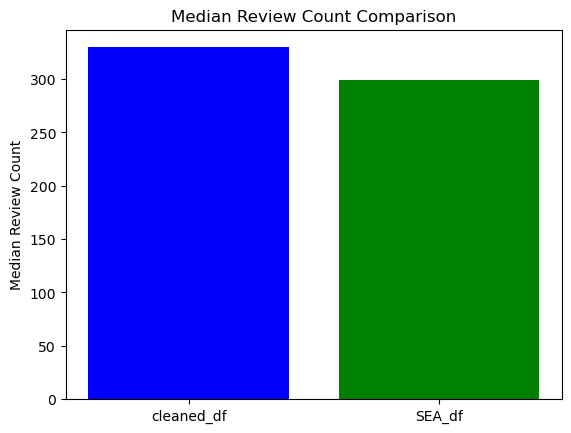

In [16]:
#compare review count for Asian places v overall dataset
import matplotlib.pyplot as plt

# Calculate medians
median_cleaned = cleaned_df['review_count'].median()
median_SEA = SEA_df['review_count'].median()

# Data for plotting
labels = ['cleaned_df', 'SEA_df']
medians = [median_cleaned, median_SEA]

# Create bar chart
plt.bar(labels, medians, color=['blue', 'green'])
plt.ylabel('Median Review Count')
plt.title('Median Review Count Comparison')
plt.show()

In [17]:
#as some of the price indicators are listed as 'None' it will be hard for us to analyse correlation
#therefore, I decided to put the mode price value into places with 'None'

import pandas as pd
import numpy as np

# Work on a copy of the slice
SEA_df_copy = SEA_df.copy()

# Replace 'None' with NaN
SEA_df_copy['price'].replace('None', np.nan, inplace=True)

# Drop rows where 'price' column has NaN values
SEA_df_copy.dropna(subset=['price'], inplace=True)

# Overwrite SEA_df
SEA_df2 = SEA_df_copy

print (len(SEA_df2))

246


In [21]:
# calculate statistic correlation between price and rating
import pandas as pd
import statsmodels.api as sm

# Convert the 'price' column from symbols to numbers
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
SEA_df2['numerical_price'] = SEA_df2['price'].map(price_mapping)

# Prepare the independent variable (Price)
X = SEA_df2['numerical_price']
X = sm.add_constant(X)  

# Dependent variable (Rating)
y = SEA_df2['rating']

# Perform linear regression
model = sm.OLS(y, X).fit()

# Display the desired results
print("Coefficient for Price:", model.params['numerical_price'])
print("P-value for Price:", model.pvalues['numerical_price'])
print("R-squared:", model.rsquared)

Coefficient for Price: 0.07078640074403221
P-value for Price: 0.0017550712147378909
R-squared: 0.03940567615575985


In [23]:
# create new column with the value of numerical price rank
SEA_df2['price_rank'] = SEA_df2['price'].map({'$': 1, '$$': 2, '$$$': 3, '$$$$': 4})

# Check the first few rows to confirm the new column has been added correctly
SEA_df2.head(2)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,numerical_price,price_rank
4,fX_E2J6LqK6u77zNa8xyJQ,jua-new-york,JUA,https://s3-media2.fl.yelpcdn.com/bphoto/0uPI4v...,False,https://www.yelp.com/biz/jua-new-york?adjust_c...,337,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,"{'latitude': 40.739694, 'longitude': -73.987832}","[delivery, pickup]",$$$$,"{'address1': '36 E 22nd St', 'address2': None,...",,,4821.847928,4,4
7,-Q8MYIWoE4EsGQtudIOY0w,bua-thai-ramen-and-robata-grill-new-york,Bua Thai Ramen & Robata Grill,https://s3-media3.fl.yelpcdn.com/bphoto/STPkeC...,False,https://www.yelp.com/biz/bua-thai-ramen-and-ro...,2397,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.5,"{'latitude': 40.7763615, 'longitude': -73.95308}","[delivery, pickup, restaurant_reservation]",$$,"{'address1': '1611 2nd Ave', 'address2': None,...",+12128797999,(212) 879-7999,9105.865768,2,2


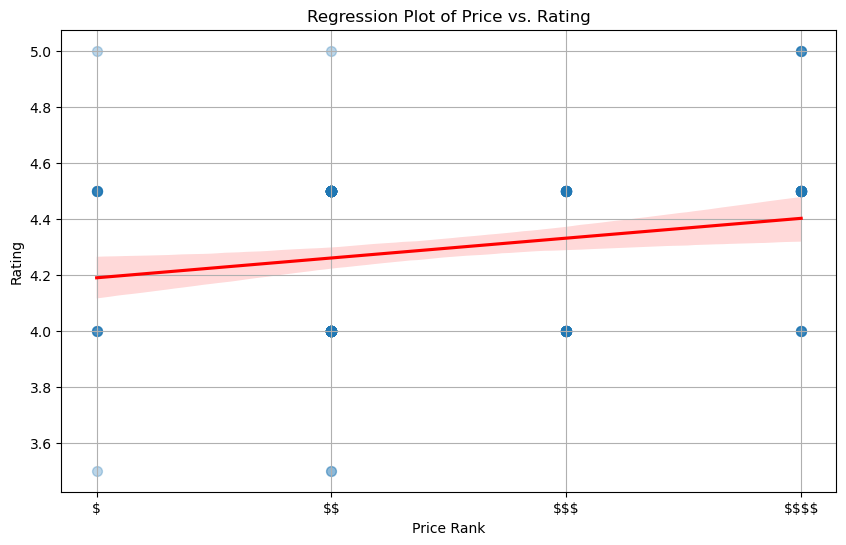

In [25]:
# Create the regression plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='price_rank', y='rating', data=SEA_df2, scatter_kws={'s':50, 'alpha':0.3}, line_kws={'color':'red'})

plt.title('Regression Plot of Price vs. Rating')
plt.xlabel('Price Rank')
plt.ylabel('Rating')
plt.xticks(ticks=[1, 2, 3, 4], labels=['\$','\$\$', '\$\$\$', '\$\$\$\$'])  # Simplified labels for x axis
plt.grid(True)
plt.show()

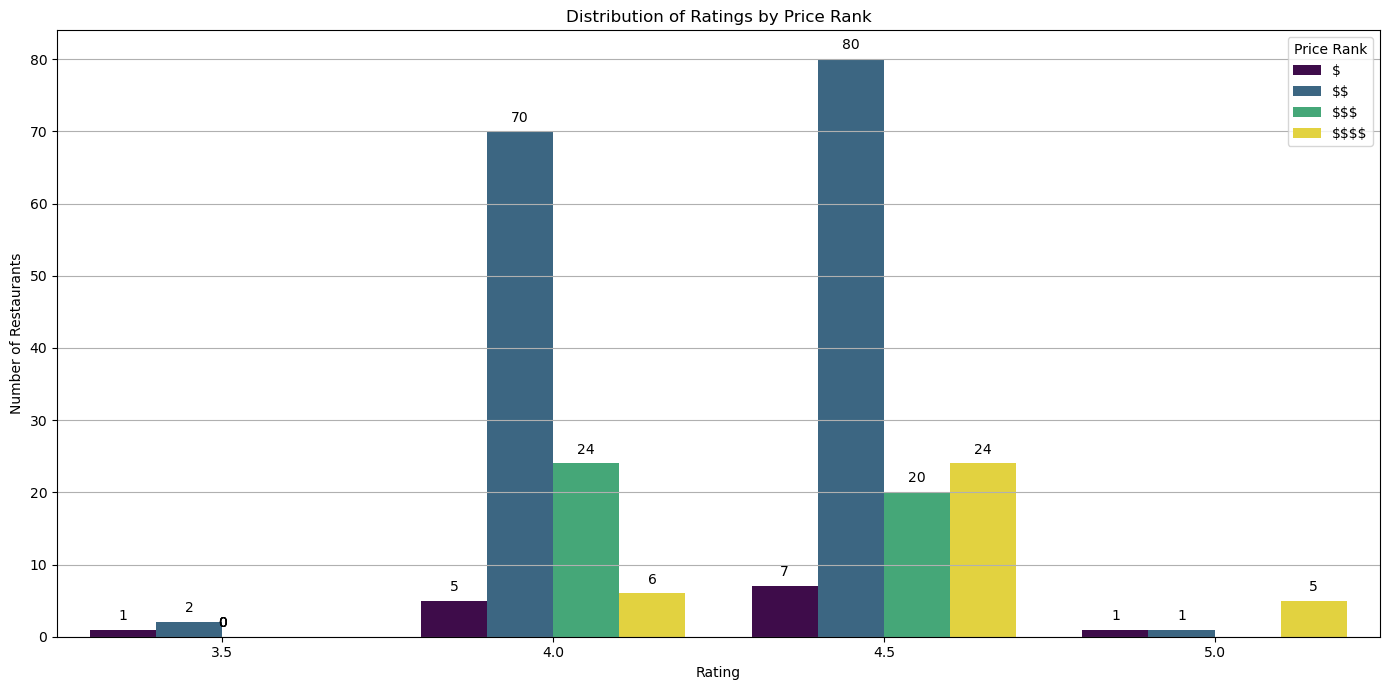

In [26]:
# creating a barchart for the number of restaurants per rating for every price rank
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
ax = sns.countplot(data=SEA_df2, x='rating', hue='price_rank', palette="viridis")

plt.title('Distribution of Ratings by Price Rank')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.legend(title='Price Rank', labels=['\$','\$\$', '\$\$\$', '\$\$\$\$'])

# Annotating the count on top of each bar for easier read
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.grid(True, which='both', axis='y')
plt.tight_layout()
plt.show()

In [39]:
#see the format of 'coordinates'
print(SEA_df2['coordinates'].iloc[200])

{'latitude': 40.76435, 'longitude': -73.97904}


In [40]:
SEA_df3 = SEA_df2.copy()

In [54]:
# Extracting latitude and longitude from 'coordinates' column
SEA_df3['lat'] = SEA_df3['coordinates'].apply(lambda x: x['latitude'])
SEA_df3['long'] = SEA_df3['coordinates'].apply(lambda x: x['longitude'])

SEA_df3.head(2)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,location,phone,display_phone,distance,numerical_price,price_rank,lat,long,POINTS,geometry
4,fX_E2J6LqK6u77zNa8xyJQ,jua-new-york,JUA,https://s3-media2.fl.yelpcdn.com/bphoto/0uPI4v...,False,https://www.yelp.com/biz/jua-new-york?adjust_c...,337,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,"{'latitude': 40.739694, 'longitude': -73.987832}",...,"{'address1': '36 E 22nd St', 'address2': None,...",,,4821.847928,4,4,40.739694,-73.987832,POINT (-73.987832 40.739694),POINT (-73.987832 40.739694)
7,-Q8MYIWoE4EsGQtudIOY0w,bua-thai-ramen-and-robata-grill-new-york,Bua Thai Ramen & Robata Grill,https://s3-media3.fl.yelpcdn.com/bphoto/STPkeC...,False,https://www.yelp.com/biz/bua-thai-ramen-and-ro...,2397,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.5,"{'latitude': 40.7763615, 'longitude': -73.95308}",...,"{'address1': '1611 2nd Ave', 'address2': None,...",+12128797999,(212) 879-7999,9105.865768,2,2,40.776362,-73.953080,POINT (-73.95308 40.7763615),POINT (-73.95308 40.7763615)


In [55]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [56]:
import geopandas as gpd

In [57]:
#try to make columns of geospatial coordinates
from shapely.geometry import Point

SEA_df3['POINTS'] = list(zip(SEA_df3.long, SEA_df3.lat))

In [58]:
SEA_df3['POINTS'] = SEA_df3['POINTS'].apply(Point)
SEA_df3_gdf = gpd.GeoDataFrame(SEA_df3, geometry='POINTS')

SEA_df3_gdf.head(2)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,location,phone,display_phone,distance,numerical_price,price_rank,lat,long,POINTS,geometry
4,fX_E2J6LqK6u77zNa8xyJQ,jua-new-york,JUA,https://s3-media2.fl.yelpcdn.com/bphoto/0uPI4v...,False,https://www.yelp.com/biz/jua-new-york?adjust_c...,337,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,"{'latitude': 40.739694, 'longitude': -73.987832}",...,"{'address1': '36 E 22nd St', 'address2': None,...",,,4821.847928,4,4,40.739694,-73.987832,POINT (-73.98783 40.73969),POINT (-73.98783 40.73969)
7,-Q8MYIWoE4EsGQtudIOY0w,bua-thai-ramen-and-robata-grill-new-york,Bua Thai Ramen & Robata Grill,https://s3-media3.fl.yelpcdn.com/bphoto/STPkeC...,False,https://www.yelp.com/biz/bua-thai-ramen-and-ro...,2397,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.5,"{'latitude': 40.7763615, 'longitude': -73.95308}",...,"{'address1': '1611 2nd Ave', 'address2': None,...",+12128797999,(212) 879-7999,9105.865768,2,2,40.776362,-73.953080,POINT (-73.95308 40.77636),POINT (-73.95308 40.77636)


In [59]:
#preparing for plot, setting up the CRS
from shapely.geometry import Point
import geopandas as gpd

# Set the original CRS to Web Mercator
SEA_df3_gdf.crs = "EPSG:3857"

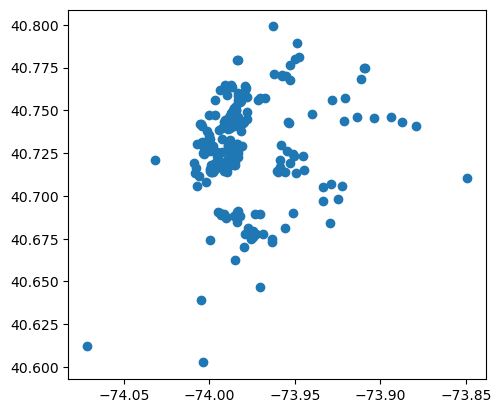

In [60]:
SEA_df3_gdf.plot()
plt.show()

In [73]:
#try to create the distribution map of places with asian cuisine with plotly express
!pip install plotly
import plotly.express as px

fig = px.scatter_mapbox(SEA_df3_gdf, lat='lat', lon='long',
                        hover_name='name',
                        hover_data=['price', 'rating'],
                        mapbox_style="carto-positron",
                        zoom=10, height=600)

fig.show()
fig.write_html("map_output1.html")

Defaulting to user installation because normal site-packages is not writeable


In [67]:
#afterwards, I'm interested to see the comparison of place distribution between asian cuisine places v overall dataset

cleaned_df2 = cleaned_df.copy()
# Extracting latitude and longitude from 'coordinates' column
cleaned_df2['lat'] = cleaned_df2['coordinates'].apply(lambda x: x['latitude'])
cleaned_df2['long'] = cleaned_df2['coordinates'].apply(lambda x: x['longitude'])

from shapely.geometry import Point

cleaned_df2['POINTS'] = list(zip(cleaned_df2.long, cleaned_df2.lat))
cleaned_df2.head(2)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,lat,long,POINTS
0,nRO136GRieGtxz18uD61DA,eleven-madison-park-new-york,Eleven Madison Park,https://s3-media1.fl.yelpcdn.com/bphoto/s_H7gm...,False,https://www.yelp.com/biz/eleven-madison-park-n...,2451,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 40.7416907417, 'longitude': -73.9...",[],$$$$,"{'address1': '11 Madison Ave', 'address2': '',...",+12128890905,(212) 889-0905,5035.227660,40.741691,-73.987207,"(-73.9872074872, 40.7416907417)"
1,SaYTVG7wHCMDBofHCgXPaA,dutch-freds-new-york-2,Dutch Freds,https://s3-media2.fl.yelpcdn.com/bphoto/312T_G...,False,https://www.yelp.com/biz/dutch-freds-new-york-...,2039,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"{'latitude': 40.760835, 'longitude': -73.987823}","[delivery, pickup]",$$,"{'address1': '307 W 47th St', 'address2': None...",+16469186923,(646) 918-6923,7154.324281,40.760835,-73.987823,"(-73.987823, 40.760835)"


In [68]:
from shapely.geometry import Point

cleaned_df2['POINTS'] = cleaned_df2['POINTS'].apply(Point)
cleaned_df2_gdf = gpd.GeoDataFrame(cleaned_df2, geometry='POINTS')

cleaned_df2_gdf.head(2)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,lat,long,POINTS
0,nRO136GRieGtxz18uD61DA,eleven-madison-park-new-york,Eleven Madison Park,https://s3-media1.fl.yelpcdn.com/bphoto/s_H7gm...,False,https://www.yelp.com/biz/eleven-madison-park-n...,2451,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 40.7416907417, 'longitude': -73.9...",[],$$$$,"{'address1': '11 Madison Ave', 'address2': '',...",+12128890905,(212) 889-0905,5035.227660,40.741691,-73.987207,POINT (-73.98721 40.74169)
1,SaYTVG7wHCMDBofHCgXPaA,dutch-freds-new-york-2,Dutch Freds,https://s3-media2.fl.yelpcdn.com/bphoto/312T_G...,False,https://www.yelp.com/biz/dutch-freds-new-york-...,2039,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"{'latitude': 40.760835, 'longitude': -73.987823}","[delivery, pickup]",$$,"{'address1': '307 W 47th St', 'address2': None...",+16469186923,(646) 918-6923,7154.324281,40.760835,-73.987823,POINT (-73.98782 40.76084)


In [69]:
from shapely.geometry import Point
import geopandas as gpd

# Create the geometry column from lat and long
cleaned_df2['geometry'] = [Point(xy) for xy in zip(cleaned_df2['long'], cleaned_df2['lat'])]

# Convert the DataFrame to a GeoDataFrame
cleaned_df2_gdf = gpd.GeoDataFrame(cleaned_df2, geometry='geometry')

# Set the original CRS to Web Mercator
cleaned_df2_gdf.crs = "EPSG:3857"

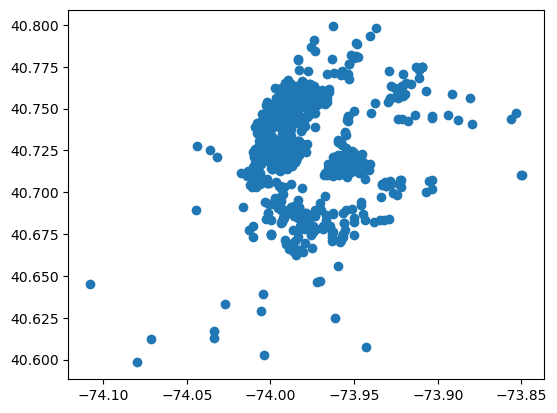

In [70]:
cleaned_df2_gdf.plot()
plt.show()

In [74]:
import plotly.graph_objects as go

# Initialize the map
fig = go.Figure()

# Adding cleaned_df2 data as non-interactive purple dots
fig.add_trace(go.Scattermapbox(
    lat=cleaned_df2['lat'],
    lon=cleaned_df2['long'],
    mode='markers',
    marker=go.scattermapbox.Marker(size=6, color='#D7BDE2'),  # Making the points purple
    hoverinfo='none',  # Making it non-interactive
    name='Reviewed Yelp Places'
))

# Adding SEA_df3_gdf data as interactive orange points
fig.add_trace(go.Scattermapbox(
    lat=SEA_df3_gdf['lat'],
    lon=SEA_df3_gdf['long'],
    mode='markers',
    marker=go.scattermapbox.Marker(size=6, color='#D35400'),  # Making the points orange
    hoverinfo='all',
    hovertext=SEA_df3_gdf['name'] + '<br>Price: ' + SEA_df3_gdf['price'].astype(str) + '<br>Rating: ' + SEA_df3_gdf['rating'].astype(str),
    name='Asian FnB'
))

# Set mapbox style and zoom
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=10,
    mapbox_center_lat=SEA_df3_gdf['lat'].mean(),
    mapbox_center_lon=SEA_df3_gdf['long'].mean()
)

fig.show()
fig.write_html("map_output2.html")
